# Recurrent Neural Network (Apple Stock Prices)

### In this model, I will be making a recurrent neural network that has several LSTM layers, in an attempt to predict the Apple stock price for a certain day given the previous 100 days. Since stock prices follow a stocastic pattern, it is not easy to predict the exact stock price every day, but a RNN can at least predict the flow that the stock price follows. 

## 1. Data Preprocessing

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [51]:
training_dataset = pd.read_csv('HistoricalQuotes.csv')
training_dataset = training_dataset.iloc[:,3:4].values

### Since the price entries are all string, we have to convert them into numbers first and then reverse their order so that the prices are listed chronological. For that, we can use the transform_array function

In [57]:
from re import sub

def transform_array(training_dataset):
    for arr in training_dataset:
        num_wo_dollarsign = sub(r'[^\d.]', '', arr[0])
        arr[0] = float(num_wo_dollarsign)
    training_dataset.reshape(2518)
    training_dataset = np.flip(training_dataset)
    training_dataset.reshape(2518, 1)
    return training_dataset

In [6]:
training_dataset = transform_array(training_dataset)
full_dataset = training_dataset

array([[29.3928],
       [29.99],
       [29.8486],
       ...,
       [286.53],
       [281.1],
       [257.26]], dtype=object)

### We will also take the last 50 price entries from the training dataset and use that as our test set. We will need the full dataset for future application, so we will store it in a variable called 'full_dataset'. We will also scale the stock prices for traning purposes.

In [9]:
test_dataset = training_dataset[len(training_dataset)-50:len(training_dataset), :]
training_dataset = training_dataset[0:len(training_dataset)-50, :]

In [10]:
len(test_dataset)
#delete

50

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_dataset = sc.fit_transform(training_dataset)

In [12]:
training_dataset[1:5]
#delete

array([[0.00241188],
       [0.00184082],
       [0.00203669],
       [0.00530235]])

In [13]:
len(training_dataset)
#delete

2468

### In order to train our RNN, we will need the 100 previous stock prices to determine the current stock price. X_train will be a 2D array, where the i th entry is an array of the 100 previous stock prices corresponding to the i th entry of y_train. We will then reshape X_train to become compatible with the model, where len(X_train) is the number of observasions, len(X_train[0]) is the number of columns and 1 is the number of indicators.

In [14]:
X_train = []
y_train = []
for i in range(100,len(training_dataset)):
    X_train.append(training_dataset[i-100:i,0])
    y_train.append(training_dataset[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (len(X_train),len(X_train[0]),1))

In [15]:
X_train, y_train = np.array(X_train), np.array(y_train)
#delete

In [16]:
X_train.shape[1]
#delete

100

In [17]:
X_train = np.reshape(X_train, (len(X_train),len(X_train[0]),1))
#delete

In [18]:
X_train
#delete

array([[[0.        ],
        [0.00241188],
        [0.00184082],
        ...,
        [0.02546089],
        [0.02143395],
        [0.03423648]],

       [[0.00241188],
        [0.00184082],
        [0.00203669],
        ...,
        [0.02143395],
        [0.03423648],
        [0.02996116]],

       [[0.00184082],
        [0.00203669],
        [0.00530235],
        ...,
        [0.03423648],
        [0.02996116],
        [0.02962071]],

       ...,

       [[0.7231906 ],
        [0.72000006],
        [0.72492722],
        ...,
        [0.97172942],
        [0.9660753 ],
        [0.96692342]],

       [[0.72000006],
        [0.72492722],
        [0.71923272],
        ...,
        [0.9660753 ],
        [0.96692342],
        [0.9627636 ]],

       [[0.72492722],
        [0.71923272],
        [0.7231906 ],
        ...,
        [0.96692342],
        [0.9627636 ],
        [0.97762585]]])

## 2. Building & compiling the RNN

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
rnn = tf.keras.models.Sequential()

In [21]:
rnn.add(LSTM(units = 50, return_sequences = True, input_shape = (len(X_train[0]),1)))
rnn.add(Dropout(0.2))

In [22]:
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.2))

In [23]:
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.2))

In [24]:
rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.2))

In [25]:
rnn.add(LSTM(units = 50))
rnn.add(Dropout(0.2))

In [26]:
rnn.add(Dense(units=1))

In [27]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
rnn.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
74/74 [==============================] - 8s 80ms/step - loss: 0.0114
Epoch 2/100
74/74 [==============================] - 6s 83ms/step - loss: 0.0028
Epoch 3/100
74/74 [==============================] - 6s 82ms/step - loss: 0.0026
Epoch 4/100
74/74 [==============================] - 6s 77ms/step - loss: 0.0026
Epoch 5/100
74/74 [==============================] - 6s 77ms/step - loss: 0.0023
Epoch 6/100
74/74 [==============================] - 7s 89ms/step - loss: 0.0021
Epoch 7/100
74/74 [==============================] - 5s 74ms/step - loss: 0.0022
Epoch 8/100
74/74 [==============================] - 5s 72ms/step - loss: 0.0019
Epoch 9/100
74/74 [==============================] - 5s 72ms/step - loss: 0.0019
Epoch 10/100
74/74 [==============================] - 5s 71ms/step - loss: 0.0018
Epoch 11/100
74/74 [==============================] - 6s 75ms/step - loss: 0.0015
Epoch 12/100
74/74 [==============================] - 6s 83ms/step - loss: 0.0017
Epoch 13/100
74/74 [=====

74/74 [==============================] - 5s 74ms/step - loss: 6.8140e-04
Epoch 98/100
74/74 [==============================] - 5s 74ms/step - loss: 6.1600e-04
Epoch 99/100
74/74 [==============================] - 5s 74ms/step - loss: 7.2379e-04
Epoch 100/100
74/74 [==============================] - 5s 74ms/step - loss: 5.9699e-04


## 3. Testing Model by Predicting Prices 

### In order to predict each stock price, we'll need the 100 respective previous stock prices, and hence, we will use the full_dataset, since some of the 100 prices for the test_dataset are in the training_dataset. Inputs will store from 100 stock prices prior to the test_dataset days. X_test will store the 50 arrays (for the 50 stock prices we are trying to predict), and each array will contain 100 stock prices prior to the predicted date. We will store the predicted stock prices in 'predicted_prices' and we will use the 'inverse_transform' function to denormalize the values and plot the predicted prices and the actual prices

In [29]:
inputs = full_dataset[len(full_dataset) - len(test_dataset) - 100:]
inputs = sc.transform(inputs)
X_test = []

for i in range(100,150):
    X_test.append(inputs[i-100:i,0])
    
X_test = np.reshape(X_test, (len(X_test), len(X_test[0]),1))
predicted_prices = rnn.predict(X_test)
predicted_prices = sc.inverse_transform(predicted_prices)

In [48]:
test_dataset

array([[279.57],
       [279.8],
       [279.5],
       [282.23],
       [280.53],
       [284.69],
       [284.82],
       [291.12],
       [289.46],
       [289.93],
       [296.24],
       [297.15],
       [293.79],
       [299.84],
       [297.16],
       [307.235],
       [310.6],
       [311.64],
       [316.7],
       [311.85],
       [313.59],
       [316.27],
       [317.19],
       [318.58],
       [317.92],
       [320.25],
       [310.06],
       [312.6],
       [324.45],
       [320.544],
       [320.93],
       [304.3],
       [315.31],
       [323.52],
       [322.57],
       [322.37],
       [314.18],
       [323.6],
       [321.47],
       [324.19],
       [324.74],
       [315.36],
       [320.0],
       [322.63],
       [318.62],
       [297.26],
       [300.95],
       [286.53],
       [281.1],
       [257.26]], dtype=object)

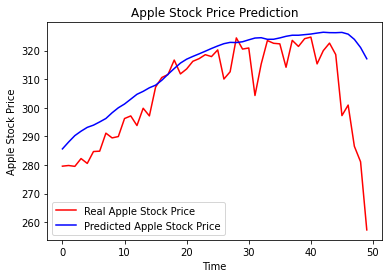

In [49]:
plt.plot(test_dataset, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_prices, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

### As you can see, the predicted prices may not be exact to the real stock prices, since real stock prices are stochastic, but the predicted values are able to follow the trend of the real prices and runs parallel to it, with exception of outliers